In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%precision 3

'%.3f'

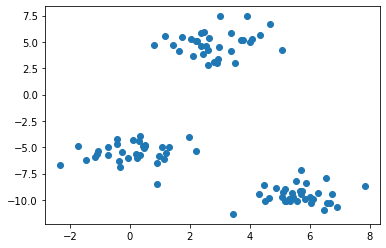

In [5]:
# k-means 군집 분석 데이터셋 준비
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# make_blobs 함수는 가로축, 세로축에서 표준 편차가 1.0인 정규분포를 따르는 난수를 얻음
# 주로 군집 분석 데이터를 얻을 때 많이 사용
# make_blobs 함수는 2개의 값 반환하므로 한쪽은 사용하지 않는 _로 입력 받음
# 파라미터를 지정하지 않으면 2차원 좌표에서 수치 세트 100개 생성
X, _ = make_blobs(random_state=10)
plt.scatter(X[:,0], X[:,1])

In [222]:
# KMeans 클래스 초기화
# n_clusters 파라미터의 값이 군집의 수에 해당 (k값)
# init = 'random'시 k-means, init = 'k-means++'시 k-means++
kmeans = KMeans(init='k-means++', n_clusters = 3)

# 군집 중심점 계산
kmeans.fit(X)

# 군집 번호 예측
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [223]:
# pd.concat(axis=1)로 가로 방향 데이터 결합
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]),
                        pd.DataFrame(y_pred)], axis=1)
merge_data

,0,0,0
0,-2.324963,-6.699996,0
1,0.518568,-4.900868,0
2,2.443018,3.846526,1
3,5.826623,-9.922593,2
4,2.033002,5.289908,1
...,...,...,...
95,-0.736931,-4.957402,0
96,2.790440,3.068621,1
97,4.486980,-10.074298,2
98,6.268638,-9.381380,2


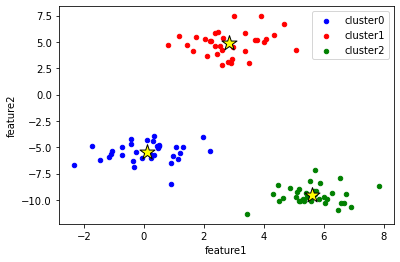

In [224]:
# 컬럼 이름 설정 // 각각 X축, Y축, 군집 번호에 해당
merge_data.columns = ['feature1', 'feature2', 'cluster']

# 산점도 그리기
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1',y='feature2', color=colors[i],
                          label=f'cluster{i}', ax=ax)

# plt.scatter의 파라미터 중 's'는 점의 크기, 'c'는 색깔에 해당
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*',
            edgecolors = 'black',s = 250, c = 'yellow')

In [46]:
# 은행의 정기예금 계좌 신청 여부를 변수로 포함하는 데이터를 활용
# 은행에서 제공한 데이터로 고객 분석하기 (목표 변수 특정 X)
# 군집 분석 해보기
import requests, io, zipfile

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [47]:
bank = pd.read_csv('bank-full.csv', sep = ';')
bank.head()
# y column은 정기 예금의 여부를 의미 (목표 변수지만 여기서는 구분하지 않음)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
# 데이터 형태와 결측 값 확인
print(f"데이터 형식 : {bank.shape}")
print(f"결측 값 수 : {bank.isnull().sum().sum()}")

데이터 형식 : (45211, 17)
결측 값 수 : 0


In [59]:
# 군집 분석을 위해 age, balance(연 평균 잔고),
# campaign(캠페인을 위한 연락 횟수), previous(캠페인 이전 연락 횟수)만 사용

from sklearn.preprocessing import StandardScaler
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]

# 변수들의 단위가 다르므로 표준화하는 전처리 시행
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


4    14734
0    24509
2     2684
1      221
5     1683
3     1380
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

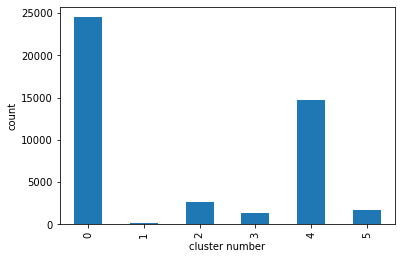

In [87]:
# KMneans 클래스 초기화
kmeans = KMeans(init='random', n_clusters=6, random_state=0)

# 군집 중심 계산
kmeans.fit(bank_sub_std)

# 군집 번호를 Series 객체로 변환
labels = pd.Series(kmeans.labels_, name='cluster_number')

# 군집 번호와 개수 출력, 그래프 출력
print(labels.value_counts(sort=False))
ax = labels.value_counts(sort=False).sort_index().plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

# 출력 결과 군집 0과 군집 4의 데이터 개수가 비교적 많음을 알 수 있음

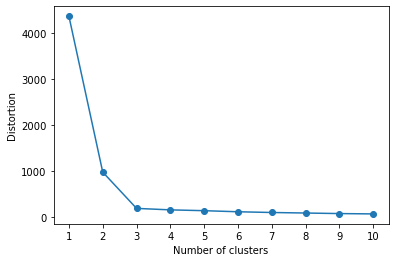

In [22]:
# 엘보우 법으로 군집의 수 추정
# make_blobs 함수의 데이터 이용

from sklearn.datasets import make_blobs
X, _ = make_blobs(random_state=10)

dist_list=[]
# 군집의 수를 1부터 10까지 증가시켜 거리의 총합 계산
# KMeans 객체의 inertia_ 속성이 거리의 총합에 해당
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,11), dist_list, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(np.linspace(1,10,10,endpoint=True))
plt.show()

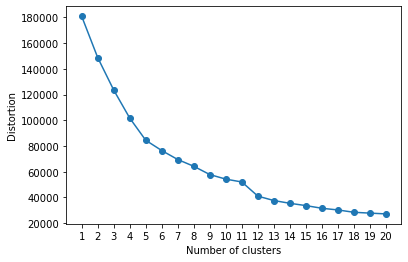

In [23]:
# 금융 마케팅 데이터에 엘보우법 사용
# 군집의 수를 1부터 2까지 증가시켜 거리의 총합 계산

dist_list = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init ='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)
    
plt.plot(range(1,21), dist_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.xticks(ticks = np.linspace(1,20,20, endpoint=True))
plt.show()

In [119]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples = 150, random_state=99)

kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=0)
kmeans.fit(X)

X_df = pd.DataFrame(X, columns = ['x1','x2'])
X_df['cluster'] = kmeans.labels_

X_df['silhouette_coef'] = silhouette_samples(X_df.drop('cluster', axis=1), X_df['cluster'])
average_score = silhouette_score(X_df[['x1','x2']], X_df['cluster'])

print(f"평균 실루엣 계수 : {average_score:.3f}")
X_df.head()

평균 실루엣 계수 : 0.604


,x1,x2,cluster,silhouette_coef
0,5.765326,1.457526,2,0.517086
1,6.912759,0.896538,2,0.610942
2,5.637020,1.692786,2,0.499394
3,2.358686,0.582731,0,0.618648
4,2.713955,0.023323,0,0.671488


In [354]:
print("군집별 평균 실루엣 계수")
X_df.groupby('cluster')['silhouette_coef'].mean()

# 편차를 알 수 있음, cluster 1의 평균 실루엣 계수가 높음

군집별 평균 실루엣 계수


cluster
0    0.502143
1    0.822329
2    0.485119
Name: silhouette_coef, dtype: float64

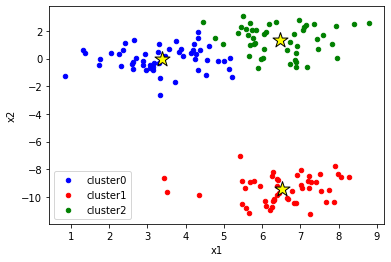

In [359]:
ax = None
colors = ['blue', 'red', 'green']
for i, data in X_df.groupby('cluster'):
    ax = data.plot.scatter(x='x1',y='x2', color=colors[i],
                          label=f'cluster{i}', ax=ax
# cluster1의 경우 다른 군집과 거리가 멀어 평균 실루엣 계수가 1에 가까움을 알 수 있음

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=250,
            c='yellow', marker='*', edgecolors='black')

In [214]:
# 금융 마케팅 데이터와 군집 분석 결과를 결합
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_, name='cluster')
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [187]:
# 군집별 연령층을 확인 ('age'와 'cluster' 변수가 기준)

# 연령 구간 나누기
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 위의 구간을 기준으로 qcut_age 변수에 각 데이터의 연령층을 분할
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)
qcut_age

0         [55, 60)
1         [40, 45)
2         [30, 35)
3         [45, 50)
4         [30, 35)
           ...    
45206     [50, 55)
45207    [65, 100)
45208    [65, 100)
45209     [55, 60)
45210     [35, 40)
Name: age, Length: 45211, dtype: category
Categories (11, interval[int64, left]): [[15, 20) < [20, 25) < [25, 30) < [30, 35) ... [50, 55) < [55, 60) < [60, 65) < [65, 100)]

In [188]:
# df에는 cluster와 qcut_age 변수만을 결합
df = pd.concat([bank_with_cluster['cluster'], qcut_age], axis=1)
df.head(5)

,cluster,age
0,4,"[55, 60)"
1,4,"[40, 45)"
2,0,"[30, 35)"
3,4,"[45, 50)"
4,0,"[30, 35)"


In [204]:
cross_cluster_age.loc[4]/cross_cluster_age.loc[4].sum()

age
[15, 20)     0.000000
[20, 25)     0.000000
[25, 30)     0.000000
[30, 35)     0.000000
[35, 40)     0.000000
[40, 45)     0.078390
[45, 50)     0.319058
[50, 55)     0.263676
[55, 60)     0.233202
[60, 65)     0.056875
[65, 100)    0.048799
Name: 4, dtype: float64

In [216]:
cross_cluster_age = df.groupby(['cluster', 'age']).size().unstack()
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster,,,,,,,,,,,
0,45,711,4024,8492,7146,4091,0,0,0,0,0
1,0,3,10,37,25,26,27,30,38,11,14
2,0,14,152,497,517,460,375,306,263,63,37
3,0,20,132,327,308,187,146,117,71,38,34
4,0,0,0,0,0,1155,4701,3885,3436,838,719
5,2,14,146,387,353,266,221,150,114,24,6


In [209]:
# 구간 분할한 데이터 수 세기
pd.value_counts(qcut_age)

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster'>

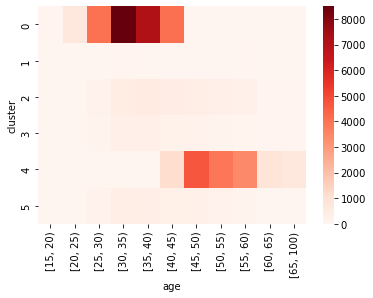

In [210]:
# 연령층 비율을 그래프로 나타내기
# 비율이 높을수록 색이 짙어지는 히트맵을 이용
sns.heatmap(cross_cluster_age, cmap='Reds')

<AxesSubplot:xlabel='age', ylabel='cluster'>

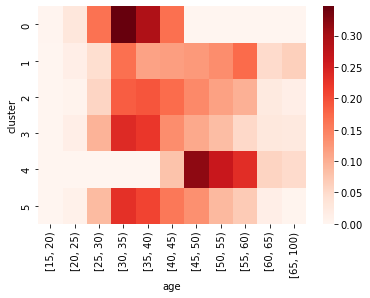

In [211]:
# apply 메서드와 lambda 이용하여 연령층을 비율로 나타내기
# apply 메서드의 결과 axis=1이므로, 열이 사라졌다고 생각하면
# cluster가 각각 0,1,2,3,4,5일 때 하나의 행 단위로 동작함
# x는 하나의 행(하나의 군집)에서 연령 구간별 인원의 수
# x.sum()은 하나의 행(하나의 군집)에서 전 연령에 있는 총 인원의 수

sns.heatmap(cross_cluster_age.apply(lambda x:x/x.sum(), axis=1), cmap='Reds')

In [220]:
cross_age_cluster = df.groupby(['age', 'cluster']).size().unstack()
cross_age_cluster

cluster,0,1,2,3,4,5
age,,,,,,
"[15, 20)",45,0,0,0,0,2
"[20, 25)",711,3,14,20,0,14
"[25, 30)",4024,10,152,132,0,146
"[30, 35)",8492,37,497,327,0,387
"[35, 40)",7146,25,517,308,0,353
"[40, 45)",4091,26,460,187,1155,266
"[45, 50)",0,27,375,146,4701,221
"[50, 55)",0,30,306,117,3885,150
"[55, 60)",0,38,263,71,3436,114


<AxesSubplot:xlabel='cluster', ylabel='age'>

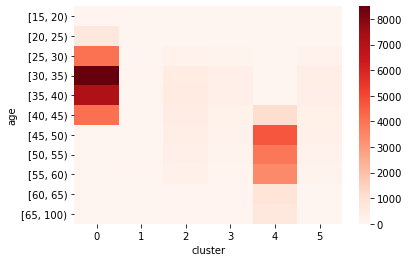

In [223]:
sns.heatmap(cross_age_cluster, cmap='Reds')

<AxesSubplot:xlabel='cluster', ylabel='age'>

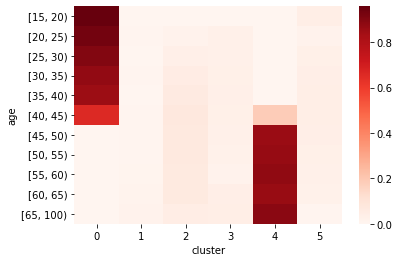

In [244]:
sns.heatmap(cross_age_cluster.apply(lambda x:x/x.sum(), axis=1), cmap='Reds')

In [215]:
cross_cluster_job = bank_with_cluster.groupby(['cluster', 'job']).size().unstack().fillna(0)
cross_cluster_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


<AxesSubplot:xlabel='job', ylabel='cluster'>

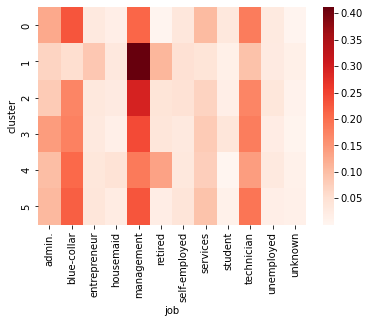

In [12]:
sns.heatmap(cross_cluster_job.apply(lambda x: x/x.sum(), axis=1), cmap='Reds')

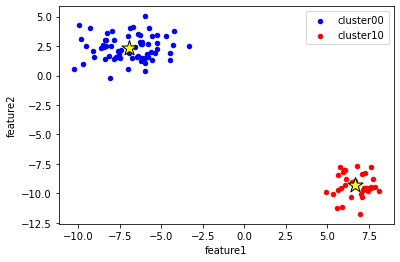

In [70]:
# 연습 문제 9-1
X, _ = make_blobs(random_state = 52)
kmeans = KMeans(init = 'k-means++', n_clusters = 2)
kmeans.fit(X)

y_pred = kmeans.predict(X)
merge_data = pd.concat([pd.DataFrame(X[:, 0]), pd.DataFrame(X[:, 1]),
                       pd.DataFrame(y_pred)], axis = 1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

ax=None
colors = ['blue', 'red']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x = 'feature1', y = 'feature2', color = colors[i], label=f'cluster{i}0', ax = ax)
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', edgecolors = 'black',
                                                s = 250, c = 'yellow')

6     8078
4    11861
1    16866
3     2427
7     3745
2      217
0      701
5     1316
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

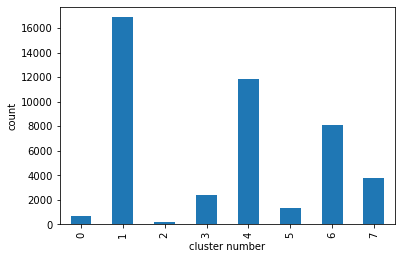

In [95]:
#  let's try
kmeans = KMeans(init = 'random', n_clusters = 8, random_state = 0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))

ax = labels.value_counts(sort = False).sort_index().plot(kind = 'bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [2]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

# reshape(-1,1)은 열을 1로 만들고 행은 그에 맞게 알아서 조정하라는 의미
X = np.array([1, 3, 5, 7, 9]).reshape(-1,1)
print(X.shape)
print(X.var())
sc.fit(X)
X_std = sc.transform(X)
X_std

(5, 1)
8.0


array([[-1.414],
       [-0.707],
       [ 0.   ],
       [ 0.707],
       [ 1.414]])

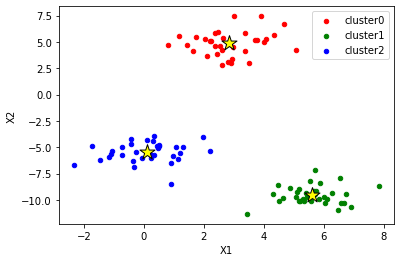

In [88]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
kmeans = KMeans(init='random', n_clusters=3)

X, _ = make_blobs(random_state = 10)

kmeans.fit(X)
Y = kmeans.predict(X)

mergedData = pd.DataFrame(X, columns = ['X1', 'X2'])
mergedData = pd.concat([mergedData, pd.DataFrame(Y, columns = ['Y'])], axis=1)

color = ['red', 'green', 'blue']
ax = None
for i, data in mergedData.groupby('Y'):
    ax = data.plot.scatter(x = 'X1',y = 'X2', color = color[i], ax=ax, label = f'cluster{i}')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 250, c = 'yellow',
           edgecolor = 'black', marker = '*')

([<matplotlib.axis.XTick at 0x200201d8fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

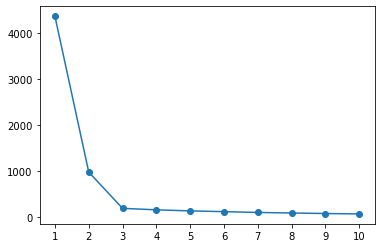

In [133]:
dist = []

X, _ = make_blobs(random_state=10)
for i in range(1, 11):
    kmeans = KMeans(init = 'k-means++', n_clusters = i)
    kmeans.fit(X)
    dist.append(kmeans.inertia_)
plt.plot(range(1,11), dist, marker='o')
plt.xticks(np.array(range(1, 11)))

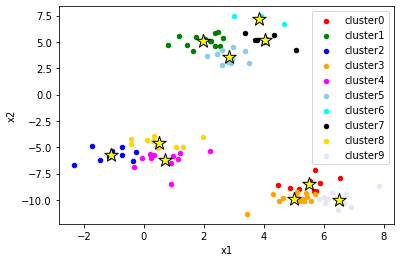

In [134]:
my_pred = kmeans.predict(X)
my_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(my_pred)], axis=1)
my_data.columns = ('x1', 'x2', 'cluster')

ax = None
colors = ['r','g','b','orange','magenta', 'skyblue', 'aqua', 'black', 'gold', 'lavender']
for i, data in my_data.groupby('cluster'):
    ax = data.plot.scatter(x = 'x1', y = 'x2', label = f'cluster{i}', ax=ax, color = colors[i])
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], edgecolor = 'black', color = 'yellow', marker='*',
           s = 200)

In [177]:
from sklearn.metrics import silhouette_samples, silhouette_score
X, _ = make_blobs(n_samples = 150, random_state = 99)
kmeans = KMeans(init = 'k-means++', n_clusters = 3)
kmeans.fit(X)


X_df = pd.DataFrame([X[:,0], X[:,1], kmeans.predict(X), silhouette_samples(X, kmeans.predict(X))], 
                    index = ['x1', 'x2', 'cluster', 'silhouette_score'])
X_df = X_df.transpose()

X_df.groupby('cluster')['silhouette_score'].mean()

cluster
0.0    0.502143
1.0    0.822329
2.0    0.485119
Name: silhouette_score, dtype: float64

In [183]:
X_df = pd.DataFrame(X)
kmeans.fit(X_df)
kmeans.labels_ == kmeans.predict(X_df)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,